In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data loading and basic preprocessing

In [78]:
df = pd.read_csv('insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [80]:
cat_cols = ['sex', 'smoker', 'region']
numerical_cols = [col for col in df.columns if col not in cat_cols]
print(numerical_cols)
print(cat_cols)

['age', 'bmi', 'children', 'expenses']
['sex', 'smoker', 'region']


In [81]:
numeical_df = df[numerical_cols]
numeical_df.head()

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86


In [82]:
category_df = df[cat_cols]
category_df.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


# Plot of distribution of numerical data

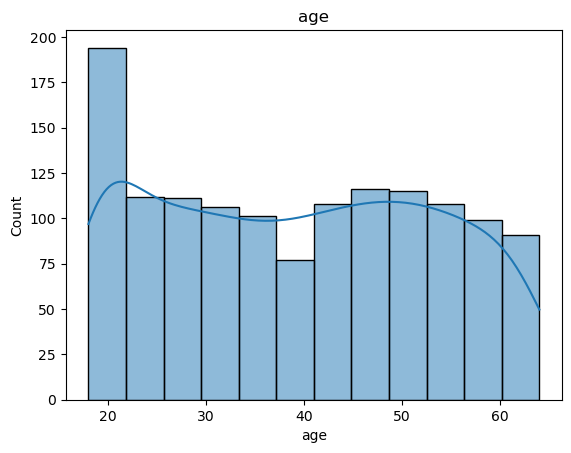

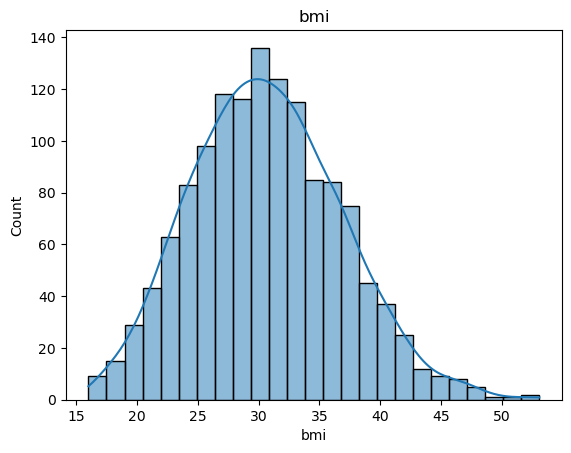

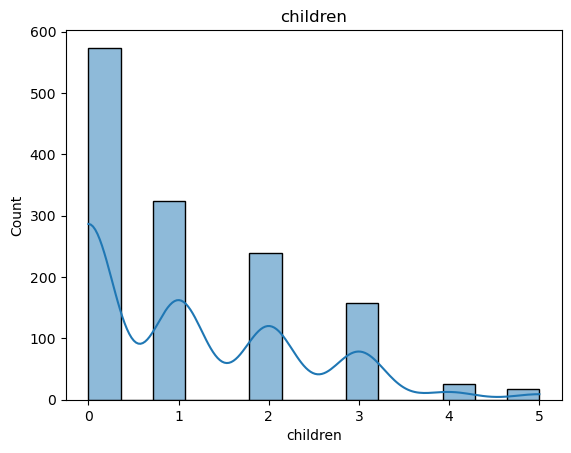

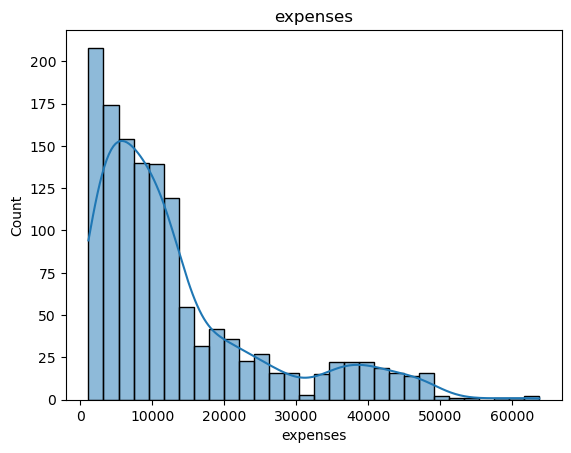

In [83]:
#plot the distribution of numerical columns using seaborn
for col in numeical_df.columns:
    sns.histplot(numeical_df[col], kde=True)
    plt.title(col)
    plt.show()

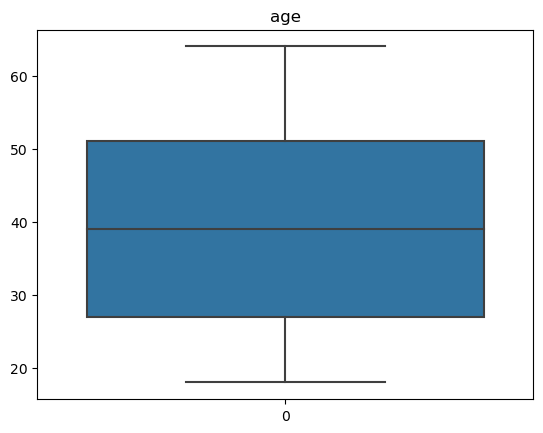

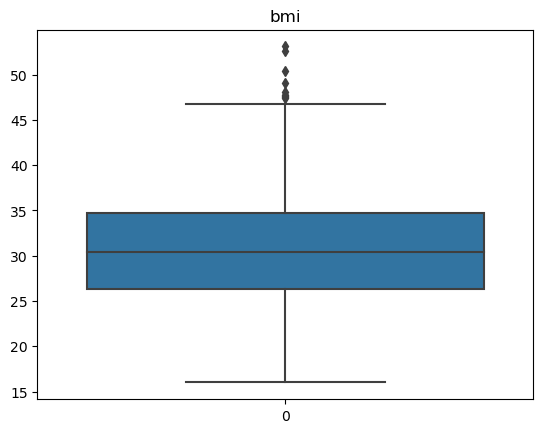

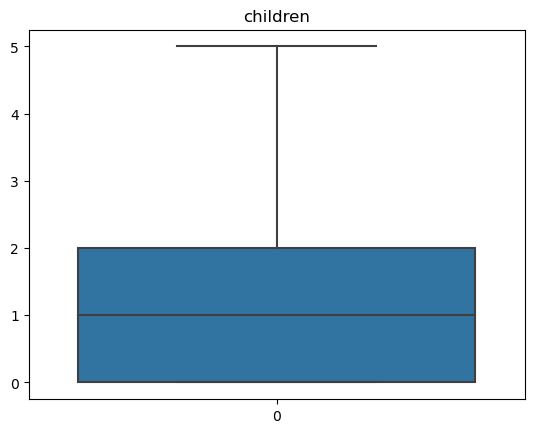

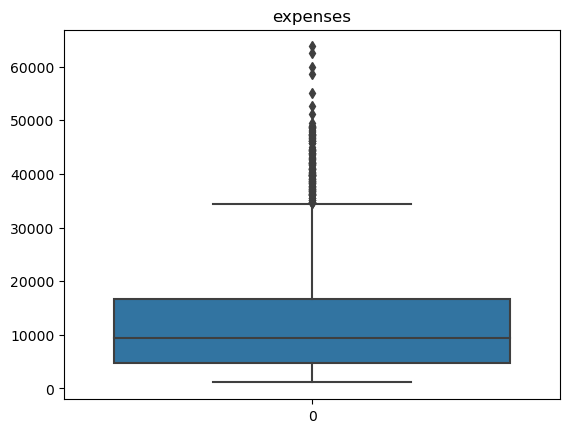

In [84]:
#use boxplot to check for outliers
for col in numeical_df.columns:
    sns.boxplot(numeical_df[col])
    plt.title(col)
    plt.show()

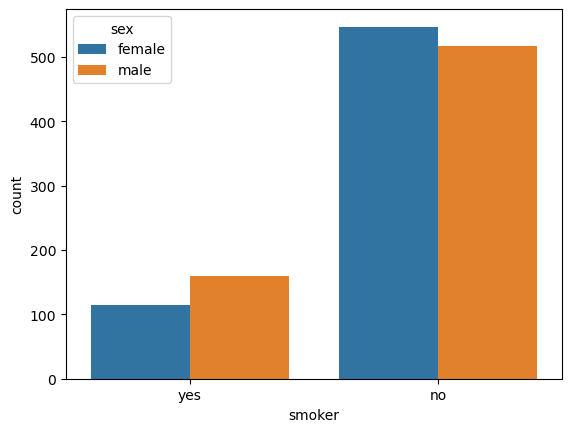

In [85]:
#plot number of smokers and non-smokers with hue as sex
sns.countplot(x='smoker', hue='sex', data=df)
plt.show()

Text(0.5, 1.0, 'Population distribution by region')

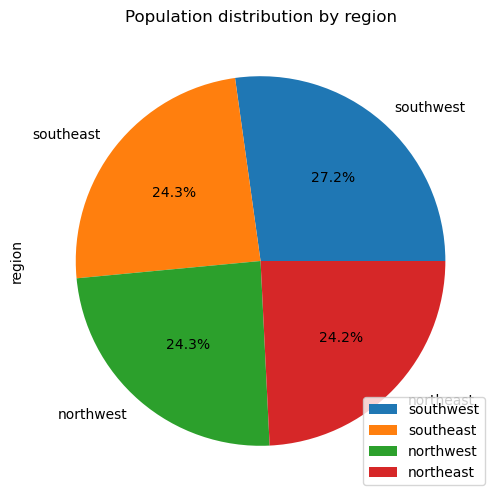

In [86]:
#plot a pie chart for the region column
df['region'].value_counts().reset_index().plot(kind='pie', y='region', autopct='%1.1f%%',labels=df['region'].unique(), figsize=(6,6))
plt.title('Population distribution by region')

<Axes: ylabel='children'>

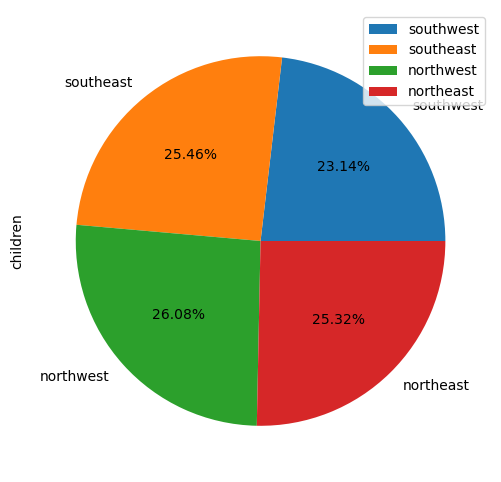

In [87]:
#pie plot of number of children in each region
df.groupby('region')['children'].sum().reset_index().plot(kind='pie', y='children', autopct='%.2f%%', labels=df['region'].unique(), figsize=(6,6))

# Underage parents

In [90]:
df[df['age']<18]

,age,sex,bmi,children,smoker,region,expenses


In [88]:
#apply standard scaler to numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numeical_df)
scaled_df = pd.DataFrame(scaled_df, columns=numeical_df.columns)
scaled_df.head()

,age,bmi,children,expenses
0,-1.438764,-0.453646,-0.908614,0.298583
1,-1.509965,0.514186,-0.078767,-0.953689
2,-0.797954,0.382954,1.580926,-0.728675
3,-0.441948,-1.306650,-0.908614,0.719843
4,-0.513149,-0.289606,-0.908614,-0.776802


In [89]:
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,-1.805565e-16,1.000374,-1.509965,-0.869155,-0.014740,0.839674,1.765289
bmi,1338.0,-4.089073e-16,1.000374,-2.405713,-0.716108,-0.043548,0.661821,3.680143
children,1338.0,-5.576008e-17,1.000374,-0.908614,-0.908614,-0.078767,0.751079,3.240619
expenses,1338.0,-8.762298e-17,1.000374,-1.003558,-0.704650,-0.321209,0.278344,4.171663
